In [1]:
import pandas as pd
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_validate
import statistics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from classification_utils import *

In [2]:
data = pd.read_csv("dataset/cleaned_user_profiles.csv", index_col=0)

In [3]:
data.head()

,name,lang,bot,created_at,statuses_count,avg_length,avg_special_chars,urls_ratio,mentions_ratio,hashtags_ratio,reply_count_mean,reply_count_std,favorite_count_mean,favorite_count_std,favorite_count_entropy,retweet_count_mean,retweet_count_std
2353593986,Lamonica Raborn,en,1,2019-02-22 18:00:42,76,62.340909,14.015152,0.000000,0.272727,0.098485,0.0,0.0,0.037879,0.190903,0.232481,0.037879,0.190903
2358850842,Lourie Botton,en,0,2019-02-26 03:02:32,54,69.082645,15.041322,0.000000,0.338843,0.024793,0.0,0.0,0.049587,0.217090,0.284639,0.024793,0.155495
137959629,Dadan Syarifudin,en,1,2015-04-30 07:09:56,53,65.340909,14.694444,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
466124818,Carletto Focia,it,1,2017-01-18 02:49:18,50,86.944871,18.689463,0.022331,0.006281,0.072575,0.0,0.0,0.165387,0.530838,0.669155,0.826239,13.034008
2571493866,MBK Ebook,en,0,2019-06-18 19:30:21,7085,72.311246,14.582073,0.000825,0.506461,0.118229,0.0,0.0,0.056365,0.243387,0.317182,0.016772,0.142619


In [4]:
#a descrption of the dataset
data.describe()

,bot,statuses_count,avg_length,avg_special_chars,urls_ratio,mentions_ratio,hashtags_ratio,reply_count_mean,reply_count_std,favorite_count_mean,favorite_count_std,favorite_count_entropy,retweet_count_mean,retweet_count_std
count,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000
mean,0.531456,5148.794751,67.100135,15.045892,0.031045,0.329076,0.088484,0.001967,0.023941,0.084281,0.365536,0.385427,1.357545,14.574041
std,0.499031,18496.606420,12.755296,2.454106,0.053379,0.315589,0.070828,0.007796,0.068508,0.109621,0.408358,0.390777,2.827068,23.390000
min,0.000000,0.000000,32.500000,9.644166,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,53.000000,59.686796,13.553296,0.000000,0.010260,0.045455,0.000000,0.000000,0.017751,0.136692,0.119116,0.010526,0.104251
50%,1.000000,57.000000,65.340909,14.694444,0.005109,0.300971,0.070423,0.000000,0.000000,0.045752,0.230747,0.268594,0.043478,0.238606
75%,1.000000,2041.000000,74.254999,16.772205,0.037445,0.450781,0.113295,0.000000,0.000000,0.088862,0.451218,0.491767,0.949402,24.144412
max,1.000000,399555.000000,104.449541,22.000000,0.287760,1.210354,0.337268,0.044444,0.333767,0.529903,2.183383,1.723913,12.902439,198.461303


In [5]:
#check if there is any null value
data.isnull().values.any()

False

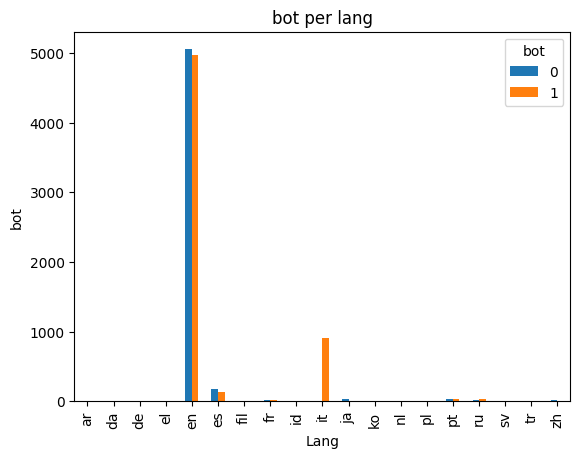

In [6]:
plot_lang_hist(data)

In [7]:
data = data.join(pd.get_dummies(data["lang"]))

In [8]:
train_set, test_set, train_label, test_label = prepare_data(data)

Classification features : ['created_at', 'statuses_count', 'avg_length', 'avg_special_chars', 'urls_ratio', 'mentions_ratio', 'hashtags_ratio', 'reply_count_mean', 'reply_count_std', 'favorite_count_mean', 'favorite_count_std', 'favorite_count_entropy', 'retweet_count_mean', 'retweet_count_std', 'ar', 'da', 'de', 'el', 'en', 'es', 'fil', 'fr', 'id', 'it', 'ja', 'ko', 'nl', 'pl', 'pt', 'ru', 'sv', 'tr', 'zh']


In [9]:
train_set.head()

,created_at,statuses_count,avg_length,avg_special_chars,urls_ratio,mentions_ratio,hashtags_ratio,reply_count_mean,reply_count_std,favorite_count_mean,...,it,ja,ko,nl,pl,pt,ru,sv,tr,zh
2267991852,1546296494,34430,44.548437,14.694444,0.029728,0.423885,0.022553,0.0,0.0,0.328549,...,0,0,0,0,0,0,0,0,0,0
2356310270,1551012862,75,60.440559,13.615385,0.000000,0.300699,0.104895,0.0,0.0,0.027972,...,0,0,0,0,0,0,0,0,0,0
467194119,1484807618,56,84.384923,18.032688,0.014009,0.006671,0.072048,0.0,0.0,0.438292,...,1,0,0,0,0,0,0,0,0,0
191348890,1442558594,2857,61.552332,12.907254,0.015544,0.346632,0.038860,0.0,0.0,0.045752,...,0,0,0,0,0,0,0,0,0,0
2356114964,1551002157,61,65.542636,14.488372,0.000000,0.387597,0.046512,0.0,0.0,0.100775,...,0,0,0,0,0,0,0,0,0,0


In [10]:
train_label.head()

2267991852    0
2356310270    1
467194119     1
191348890     0
2356114964    1
Name: bot, dtype: int64

### Usage of Lang

In [11]:
scaler = StandardScaler()

train_X = scaler.fit_transform(train_set.values)
test_X = scaler.transform(test_set.values)

In [12]:
# make grid search

parameters = {
    'kernel':('linear', 'rbf', 'poly', 'sigmoid'), 
    'C':[0.001, 0.1, 1, 10],
}

svc = SVC()

grid_search = GridSearchCV(svc, parameters)


grid_search.fit(train_X, train_label)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.001, 0.1, 1, 10],
                         'kernel': ('linear', 'rbf', 'poly', 'sigmoid')})

In [13]:
clf = grid_search.best_estimator_

In [14]:
clf

SVC(C=10, kernel='linear')

In [15]:
#predict on the test set
train_pred = clf.predict(train_X)
test_pred = clf.predict(test_X)

In [16]:
print_metrics(train_label, train_pred, test_label, test_pred)

Accuracy train set  0.8459342023587834
Accuracy test set  0.8305821025195482
Precision train set  0.8702603057039131
Recall train set  0.8459342023587834
F1 score train set  0.8417879839451785
Support train set  (array([0.9678611, 0.7842184]), array([0.69422364, 0.97967765]), array([0.8085172, 0.8711185]), array([3774, 4281]))


In [17]:
#compute the performance of the model
report_scores(test_label,test_pred)

              precision    recall  f1-score   support

        <=50       0.94      0.68      0.79      1618
         >50       0.77      0.96      0.86      1835

    accuracy                           0.83      3453
   macro avg       0.86      0.82      0.82      3453
weighted avg       0.85      0.83      0.83      3453



In [18]:
# cross validation
scores = cross_validate(clf, train_X, train_label, cv=3, return_train_score= True)
print('Fit time ', statistics.mean(scores['fit_time']))
print('Score time ', statistics.mean(scores['score_time']))
print('Test score ', statistics.mean(scores['test_score']))
print('Train score ', statistics.mean(scores['train_score']))

Fit time  5.818435033162435
Score time  0.10166692733764648
Test score  0.8439478584729981
Train score  0.8454996896337679


/Users/lucamoroni/Desktop/__WorkSpace/__Universita/unipi/DataMining/Data_Mining_22_23/venv/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


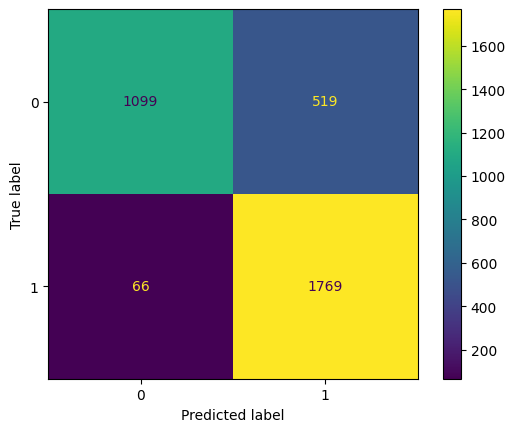

In [19]:
#it is possible to plot the confusion matrix 
#compute confusion matrix
cm = confusion_matrix(test_label, test_pred)
plot_confusion_matrix(clf, test_X, test_label)
plt.show() 

In [20]:
pca = PCA(n_components=2)
test_set_reduced = pca.fit_transform(test_X)

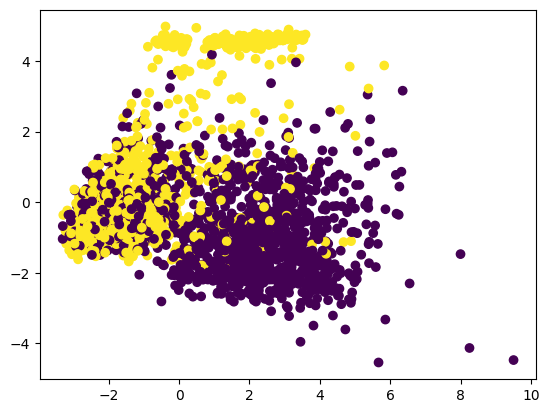

In [21]:
#true labels
from sklearn.datasets import make_blobs
plt.scatter(test_set_reduced[:, 0], test_set_reduced[:, 1], c=test_label);

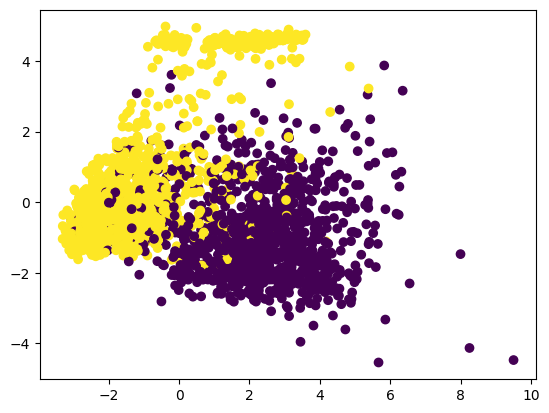

In [22]:
#predicted labels
plt.scatter(test_set_reduced[:, 0], test_set_reduced[:, 1], c=test_pred);

### Removed Lang Attribute for classification

In [23]:
train_set.head()

,created_at,statuses_count,avg_length,avg_special_chars,urls_ratio,mentions_ratio,hashtags_ratio,reply_count_mean,reply_count_std,favorite_count_mean,...,it,ja,ko,nl,pl,pt,ru,sv,tr,zh
2267991852,1546296494,34430,44.548437,14.694444,0.029728,0.423885,0.022553,0.0,0.0,0.328549,...,0,0,0,0,0,0,0,0,0,0
2356310270,1551012862,75,60.440559,13.615385,0.000000,0.300699,0.104895,0.0,0.0,0.027972,...,0,0,0,0,0,0,0,0,0,0
467194119,1484807618,56,84.384923,18.032688,0.014009,0.006671,0.072048,0.0,0.0,0.438292,...,1,0,0,0,0,0,0,0,0,0
191348890,1442558594,2857,61.552332,12.907254,0.015544,0.346632,0.038860,0.0,0.0,0.045752,...,0,0,0,0,0,0,0,0,0,0
2356114964,1551002157,61,65.542636,14.488372,0.000000,0.387597,0.046512,0.0,0.0,0.100775,...,0,0,0,0,0,0,0,0,0,0


In [24]:
for lang in data.lang.unique():
    del train_set[lang]
    del test_set[lang]

In [25]:
train_set.head()

,created_at,statuses_count,avg_length,avg_special_chars,urls_ratio,mentions_ratio,hashtags_ratio,reply_count_mean,reply_count_std,favorite_count_mean,favorite_count_std,favorite_count_entropy,retweet_count_mean,retweet_count_std
2267991852,1546296494,34430,44.548437,14.694444,0.029728,0.423885,0.022553,0.0,0.0,0.328549,1.074470,0.996305,5.734495,35.079718
2356310270,1551012862,75,60.440559,13.615385,0.000000,0.300699,0.104895,0.0,0.0,0.027972,0.164893,0.184117,0.020979,0.143314
467194119,1484807618,56,84.384923,18.032688,0.014009,0.006671,0.072048,0.0,0.0,0.438292,0.937344,1.242857,0.994663,12.864303
191348890,1442558594,2857,61.552332,12.907254,0.015544,0.346632,0.038860,0.0,0.0,0.045752,1.080037,1.710307,1.767358,18.541154
2356114964,1551002157,61,65.542636,14.488372,0.000000,0.387597,0.046512,0.0,0.0,0.100775,0.495639,0.400166,0.108527,0.378498


In [26]:
scaler = StandardScaler()

train_X = scaler.fit_transform(train_set.values)
test_X = scaler.transform(test_set.values)

In [27]:
# make grid search

parameters = {
    'kernel':('linear', 'rbf', 'poly', 'sigmoid'), 
    'C':[0.001, 0.1, 1, 10],
}

svc = SVC()

grid_search = GridSearchCV(svc, parameters)


grid_search.fit(train_X, train_label)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.001, 0.1, 1, 10],
                         'kernel': ('linear', 'rbf', 'poly', 'sigmoid')})

In [28]:
clf = grid_search.best_estimator_

In [29]:
clf

SVC(C=10, kernel='linear')

In [30]:
#predict on the test set
train_pred = clf.predict(train_X)
test_pred = clf.predict(test_X)

In [31]:
print_metrics(train_label, train_pred, test_label, test_pred)

Accuracy train set  0.8477963997517071
Accuracy test set  0.8328989284679988
Precision train set  0.8753315541989741
Recall train set  0.8477963997517071
F1 score train set  0.843326030835463
Support train set  (array([0.98039216, 0.78271331]), array([0.68892422, 0.98785331]), array([0.80921257, 0.87339942]), array([3774, 4281]))


In [32]:
#compute the performance of the model
report_scores(test_label,test_pred)

              precision    recall  f1-score   support

        <=50       0.96      0.67      0.79      1618
         >50       0.77      0.98      0.86      1835

    accuracy                           0.83      3453
   macro avg       0.87      0.82      0.83      3453
weighted avg       0.86      0.83      0.83      3453



In [33]:
# cross validation
scores = cross_validate(clf, train_X, train_label, cv=3, return_train_score= True)
print('Fit time ', statistics.mean(scores['fit_time']))
print('Score time ', statistics.mean(scores['score_time']))
print('Test score ', statistics.mean(scores['test_score']))
print('Train score ', statistics.mean(scores['train_score']))

Fit time  3.297017256418864
Score time  0.12033526102701823
Test score  0.8451893234016139
Train score  0.8458100558659218


/Users/lucamoroni/Desktop/__WorkSpace/__Universita/unipi/DataMining/Data_Mining_22_23/venv/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


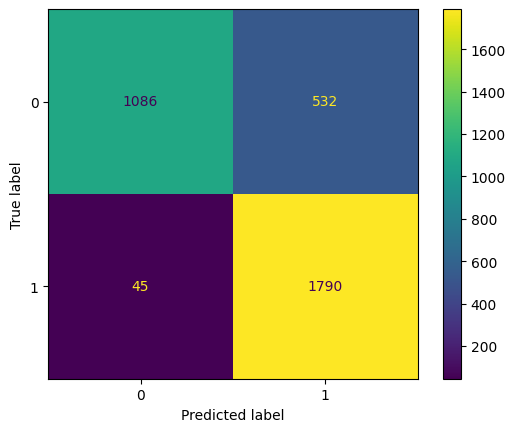

In [34]:
#it is possible to plot the confusion matrix 
#compute confusion matrix
cm = confusion_matrix(test_label, test_pred)
plot_confusion_matrix(clf, test_X, test_label)
plt.show() 

In [35]:
pca = PCA(n_components=2)
test_set_reduced = pca.fit_transform(test_X)

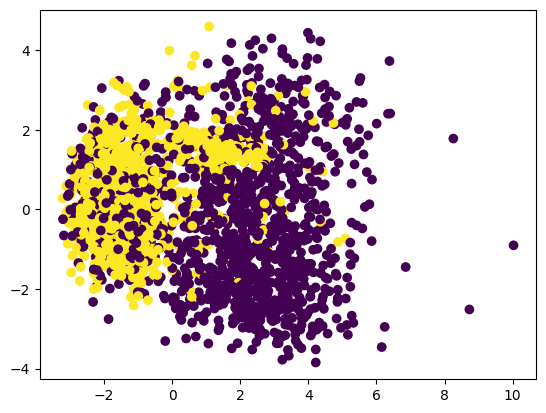

In [36]:
#true labels
from sklearn.datasets import make_blobs
plt.scatter(test_set_reduced[:, 0], test_set_reduced[:, 1], c=test_label);

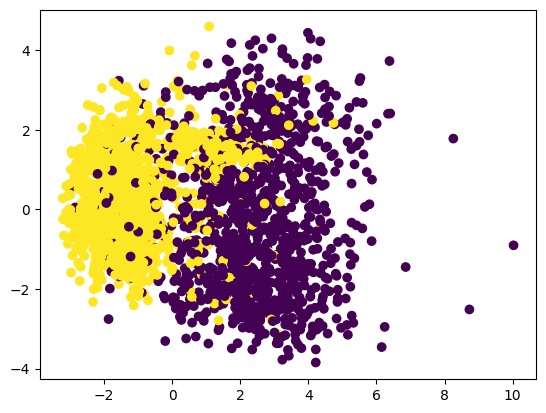

In [37]:
#predicted labels
plt.scatter(test_set_reduced[:, 0], test_set_reduced[:, 1], c=test_pred);